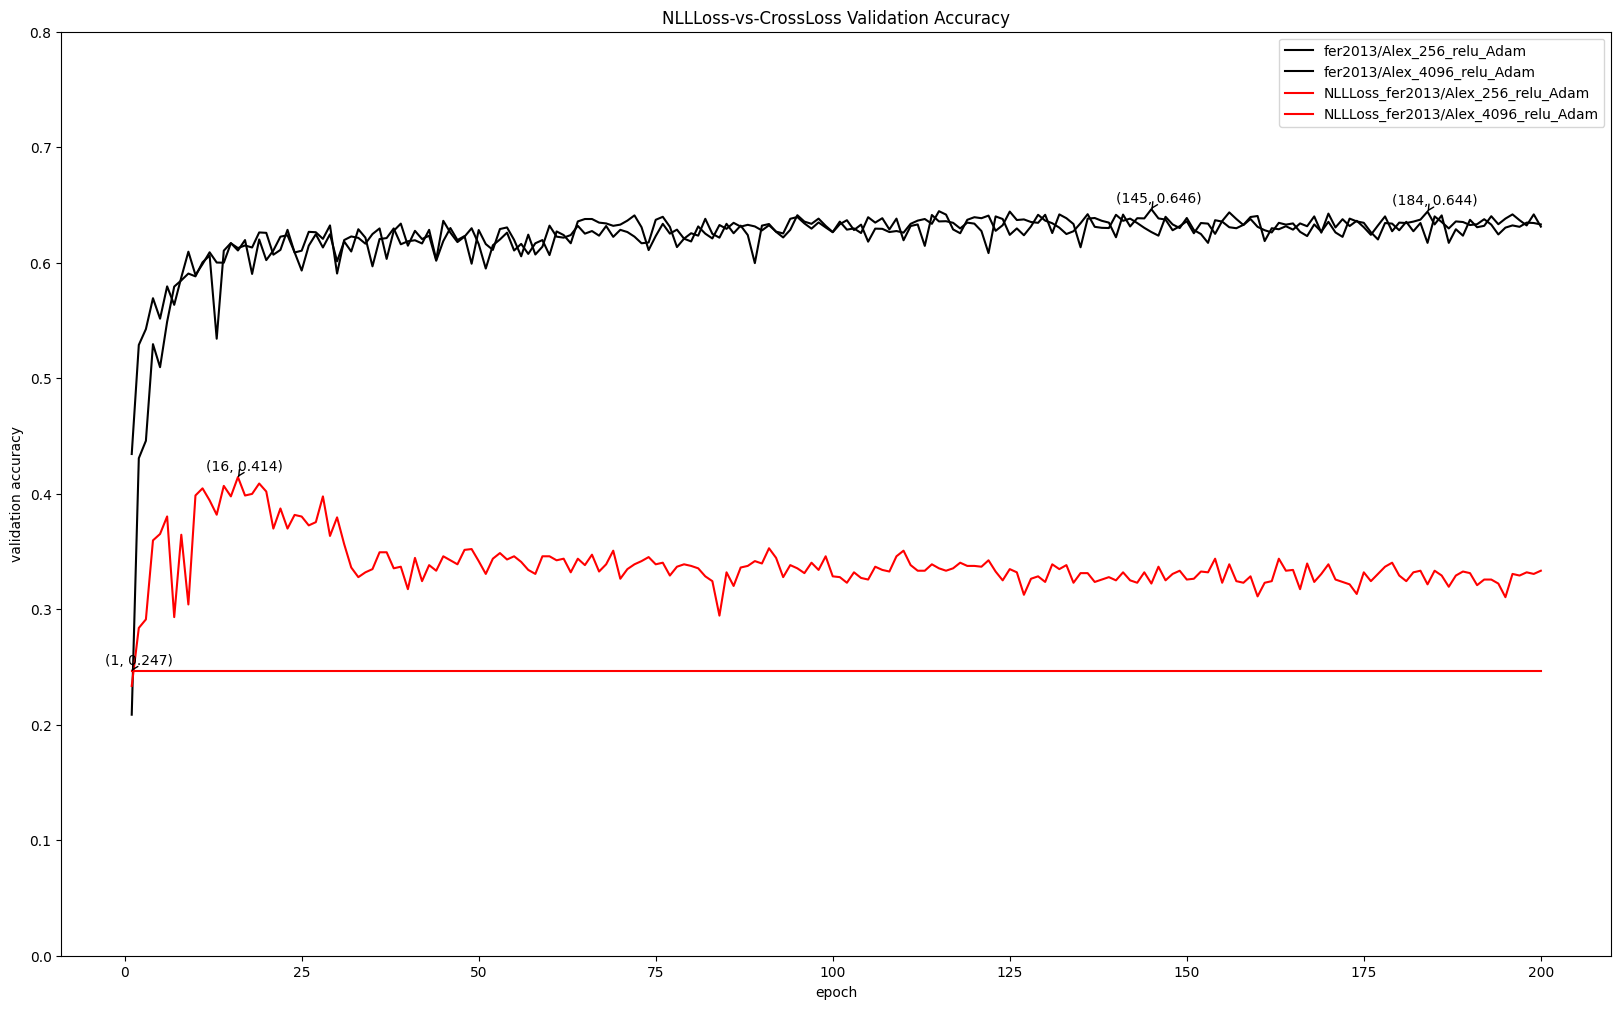

In [1]:
# Validation Accuracy

import matplotlib.pyplot as plt
import sys

sys.path.append("../../")  # Add the parent directory to the Python path
import helper.utility as utility

# Model list
model_configs = [
    "fer2013/Alex_256_relu_Adam",
    "fer2013/Alex_4096_relu_Adam",
    "NLLLoss_fer2013/Alex_256_relu_Adam",
    "NLLLoss_fer2013/Alex_4096_relu_Adam",
]

# Define different colors for the lines
colors = [
    "black",
    "black",
    "red",
    "red",
]
plt.figure(figsize=(20, 12))

for i, model_name in enumerate(model_configs):
    identifier = model_name

    # load and plot the loss history
    record_save_path = "../../model_data/" + identifier
    data = utility.read_pickle_files(record_save_path + "/val_accuracy_history.pkl")

    # Find the maximum accuracy and its corresponding epoch
    max_accuracy = max(data)
    max_epoch = data.index(max_accuracy) + 1  # Adding 1 because epochs start from 1

    plt.plot(
        range(1, len(data) + 1),
        data,
        label=identifier,
        color=colors[i],
    )

    # Annotating the maximum point
    plt.annotate(
        f"({max_epoch}, {max_accuracy:.3f})",
        xy=(max_epoch, max_accuracy),
        xytext=(5, 5),  # Slight offset for text
        textcoords="offset points",
        arrowprops=dict(arrowstyle="->", lw=1),
        ha="center",
    )

plt.xlabel("epoch")
plt.ylabel("validation accuracy")
plt.title("NLLLoss-vs-CrossLoss Validation Accuracy")
plt.legend()

plt.ylim(0, 0.8)

plt.savefig("../../model_data/NLLLoss_fer2013/NLLLoss_vs_CrossLoss_val_acc.png")
plt.show()